In [121]:
#Import all the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce
import math
import urllib
import difflib 
import seaborn as sns
import sklearn.model_selection
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score

# Step One
First we must load the data we previously prepared from the 'Vela Partners  -Data Loading' notebook, university ranking data, managerial title data, stock market data

In [122]:
'''Loads the dataframe of the spreadsheets with the data all together'''
df_All_Companies_merged = pd. read_pickle(r'Data\df_All_Companies_merged.pkl')

In [123]:
'''Loads the University ranking data
    
    This is the QS ranking data acquired from 
    https://www.qs.com/portfolio-items/qs-world-university-rankings-2022-result-tables-excel
'''
#Importing importing university ranking data
df_University_Rankings = pd.read_excel(r'Data\2022_QS_World_University_Rankings_Results_public_version_modified.xlsx')

In [124]:
'''Loads the Stock market data ranking data and creates a list of all publically traded companies
    
    This is the data acquired from 
    https://www.nasdaq.com/market-activity/stocks/screener
'''
df_Stock_Market = pd.read_csv(r'Data\nasdaq_screener _data.csv')
list_of_allpublically_listed_companies = [x.upper() for x in list(set(df_Stock_Market['Name'].values[:].tolist()))]

# Step Two
Now we shall create some lists of all the information that is in each column and count how often it occurs to get an idea of frequencies

In [125]:
'''
We create a list of name of all investors and count the number of occurances

The list 'list_all_investor_names_and_count' is a 2-d list where each list inside 'list_all_investor_names_and_count'
is of the form [count, investor name]

'''

temp = df_All_Companies_merged['investor_name'].values[:].tolist()
list_all_investor_names_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]
list_all_investor_names_unfiltered = reduce(lambda x,y :x+y ,list_all_investor_names_unfiltered)
list_all_investor_names = list(set(list_all_investor_names_unfiltered))
list_all_investor_names_and_count = [[0,x] for x in list_all_investor_names]

for x in list_all_investor_names_unfiltered:
    idx = list_all_investor_names.index(x)
    list_all_investor_names_and_count[idx][0] += 1

list_all_investor_names_and_count.sort(reverse=True)

for idx, value in enumerate(list_all_investor_names_and_count):
    if idx == 10: break
    print('The top {} investor is {} occuring {} times'.format(idx + 1, value[1], value[0] ))

The top 1 investor is Y Combinator occuring 580 times
The top 2 investor is Techstars occuring 456 times
The top 3 investor is 500 Startups occuring 420 times
The top 4 investor is SV Angel occuring 229 times
The top 5 investor is Right Side Capital Management occuring 163 times
The top 6 investor is Plug and Play Tech Center occuring 152 times
The top 7 investor is Alchemist Accelerator occuring 147 times
The top 8 investor is First Round Capital occuring 124 times
The top 9 investor is Andreessen Horowitz occuring 122 times
The top 10 investor is GV occuring 118 times


In [126]:
'''We construct a list of all universities names'''
temp = df_All_Companies_merged['universities_of_founders'].values[:].tolist()
list_all_universities_of_founders = [x.split(',') for x in temp if isinstance(x, str)]
list_all_universities_of_founders = reduce(lambda x,y :x+y ,list_all_universities_of_founders)
list_all_universities_of_founders = list(set(list_all_universities_of_founders))

In [176]:
'''List of all degrees names of the founders'''
temp = df_All_Companies_merged['degrees_of_founders'].values[:].tolist()
list_all_degrees_of_founders = [x.split(',') for x in temp if isinstance(x, str)]
list_all_degrees_of_founders = reduce(lambda x,y :x+y ,list_all_degrees_of_founders)
list_all_degrees_of_founders = list(set(list_all_degrees_of_founders))

'''Use this code if you want to write the list to an excel file for labelling:


#df_all_degrees_of_founders = pd.DataFrame(list_all_degrees_of_founders, columns =['degrees'])
#writer = pd.ExcelWriter("Data\degrees of founders (unedited).xlsx", engine='xlsxwriter')
#df_all_degrees_of_founders.to_excel(writer,sheet_name = 'degrees', index=False)
#writer.save() 


'''
print()

In [128]:
'''List of all subject degrees names'''
temp = df_All_Companies_merged['subject_degrees_of_founders'].values[:].tolist()
list_all_subject_degrees_of_founders = [x.split(',') for x in temp if isinstance(x, str)]
list_all_subject_degrees_of_founders = reduce(lambda x,y :x+y ,list_all_subject_degrees_of_founders)
list_all_subject_degrees_of_founders = list(set(list_all_subject_degrees_of_founders))

In [129]:
'''List of all previous titles of founders'''
temp = df_All_Companies_merged['prev_title_of_founders'].values[:].tolist()
list_all_prev_title_of_founders = [x.split(',') for x in temp if isinstance(x, str)]
list_all_prev_title_of_founders = reduce(lambda x,y :x+y ,list_all_prev_title_of_founders)
list_all_prev_title_of_founders = list(set(list_all_prev_title_of_founders))

In [130]:
'''List of all categories

The list 'list_all_categories_and_count' is a 2-d list where each list inside 'list_all_categories_and_count'
is of the form [count, category name]

'''
temp = df_All_Companies_merged['category_list'].values[:].tolist()
list_all_categories_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]
list_all_categories_unfiltered = reduce(lambda x,y :x+y ,list_all_categories_unfiltered)
list_all_categories = list(set(list_all_categories_unfiltered))
list_all_categories_and_count = [[0,x] for x in list_all_categories]

for x in list_all_categories_unfiltered:
    idx = list_all_categories.index(x)
    list_all_categories_and_count[idx][0] += 1

list_all_categories_and_count.sort(reverse=True)

for idx, value in enumerate(list_all_categories_and_count):
    if idx == 10: break
    print('The top {} category is {} occuring {} times'.format(idx + 1, value[1], value[0] ))

The top 1 category is Software occuring 23475 times
The top 2 category is Information Technology occuring 9874 times
The top 3 category is Apps occuring 5540 times
The top 4 category is Mobile occuring 4574 times
The top 5 category is SaaS occuring 4146 times
The top 6 category is Internet occuring 3843 times
The top 7 category is Mobile Apps occuring 3748 times
The top 8 category is Web Development occuring 3313 times
The top 9 category is Enterprise Software occuring 3233 times
The top 10 category is Consulting occuring 2739 times


In [131]:
'''#List of all category groups

The list 'list_all_category_groups_and_count' is a 2-d list where each list inside 'list_all_category_groups_and_count'
is of the form [count, category group]

'''
temp = df_All_Companies_merged['category_groups_list'].values[:].tolist()
list_all_category_groups_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]
list_all_category_groups_unfiltered = reduce(lambda x,y :x+y ,list_all_category_groups_unfiltered)
list_all_category_groups = list(set(list_all_category_groups_unfiltered))

list_all_category_groups_and_count = [[0,x] for x in list_all_category_groups]
for x in list_all_category_groups_unfiltered:
    idx = list_all_category_groups.index(x)
    list_all_category_groups_and_count[idx][0] += 1

list_all_category_groups_and_count.sort(reverse=True)

for idx, value in enumerate(list_all_category_groups_and_count):
    if idx == 10: break
    print('The top {} category group is {} occuring {} times'.format(idx + 1, value[1], value[0] ))

The top 1 category group is Software occuring 43874 times
The top 2 category group is Information Technology occuring 14674 times
The top 3 category group is Internet Services occuring 11677 times
The top 4 category group is Mobile occuring 9255 times
The top 5 category group is Apps occuring 9109 times
The top 6 category group is Data and Analytics occuring 7978 times
The top 7 category group is Hardware occuring 7434 times
The top 8 category group is Sales and Marketing occuring 6776 times
The top 9 category group is Media and Entertainment occuring 5917 times
The top 10 category group is Professional Services occuring 5225 times


In [177]:
'''#List of previous companies of founders

The list 'list_all_prev_companies_of_founders_and_count' is a 2-d list where each 
list inside 'list_all_prev_companies_of_founders_and_count' is of the form [count, category group]

'''
temp = df_All_Companies_merged['prev_companies_of_founders'].values[:].tolist()
list_all_prev_companies_of_founders_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]
list_all_prev_companies_of_founders_unfiltered = reduce(lambda x,y :x+y ,list_all_prev_companies_of_founders_unfiltered)
list_all_prev_companies_of_founders = list(set(list_all_prev_companies_of_founders_unfiltered))

list_all_prev_companies_of_founders_and_count = [[0,x] for x in list_all_prev_companies_of_founders]
for x in list_all_prev_companies_of_founders_unfiltered:
    idx = list_all_prev_companies_of_founders.index(x)
    list_all_prev_companies_of_founders_and_count[idx][0] += 1

list_all_prev_companies_of_founders_and_count.sort(reverse=True)

for idx, value in enumerate(list_all_prev_companies_of_founders_and_count):
    if idx == 10: break
    print('The top {} previous company of founder is {} occuring {} times'.format(idx + 1, value[1], value[0] ))

The top 1 previous company of founder is  Inc. occuring 1209 times
The top 2 previous company of founder is Google occuring 623 times
The top 3 previous company of founder is Microsoft occuring 423 times
The top 4 previous company of founder is  LLC occuring 331 times
The top 5 previous company of founder is Apple occuring 191 times
The top 6 previous company of founder is  Inc occuring 188 times
The top 7 previous company of founder is Meta occuring 186 times
The top 8 previous company of founder is Yahoo occuring 176 times
The top 9 previous company of founder is Squad occuring 161 times
The top 10 previous company of founder is Techstars occuring 150 times


# Step 3
Now shall collate the data and see if there are any insights from data collation.


##  Data Aggregations
We will want to count
1. The nummber of total founders
2. The number of male founders
3. The number of female founders
4. The percentage of male founders
5. The number of investors
6. The success rate of investors
7. TBC....


In [133]:
def generate_box_plots(corr_params, save_flag = False):
    for param in corr_params:
        var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
        var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
        print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))
        plt.figure(figsize=(5, 5))
        sns.boxplot(x='success_flag',y=param,data=df_All_Companies_merged, palette='rainbow')
        if save_flag:
            file_name = 'Figures\\' + param + '.png'
            plt.savefig(file_name)

In [134]:
'''Gender Aggregation

Here we will count the number of
1. Founders
2. Male founders
3. Female founders

and the percentage of founders that are male.

'''
temp = df_All_Companies_merged['gender_of_founders'].values[:].tolist()
df_All_Companies_merged['number_of_founders'] = float('nan')
df_All_Companies_merged.at[idx, 'number_of_male_founders'] = float('nan')
df_All_Companies_merged.at[idx, 'number_of_female_founders'] = float('nan')
df_All_Companies_merged.at[idx, 'percentage_of_male_founders'] = float('nan')

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    temp2 = temp[idx].count(',') + 1
    df_All_Companies_merged.at[idx, 'number_of_founders'] = temp2
    df_All_Companies_merged.at[idx, 'number_of_male_founders'] = temp2 - temp[idx].count('female')
    df_All_Companies_merged.at[idx, 'number_of_female_founders'] = temp[idx].count('female')
    df_All_Companies_merged.at[idx, 'percentage_of_male_founders'] = (temp2 - temp[idx].count('female')) / (temp[idx].count(',') + 1)

The correlation between Success and number_of_founders: 0.1567136540475303
The correlation between Success and number_of_male_founders: 0.16992105387371695
The correlation between Success and number_of_female_founders: -0.025637497175650475
The correlation between Success and percentage_of_male_founders: 0.05020437228616166


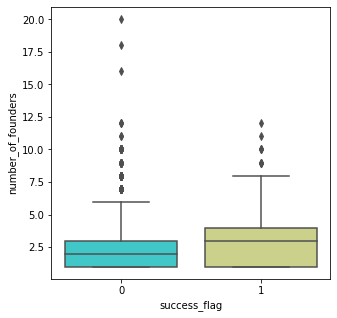

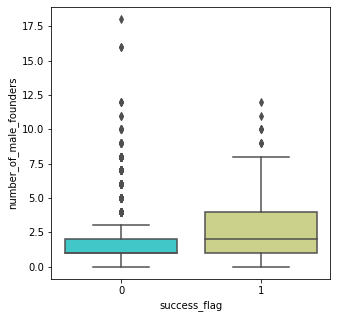

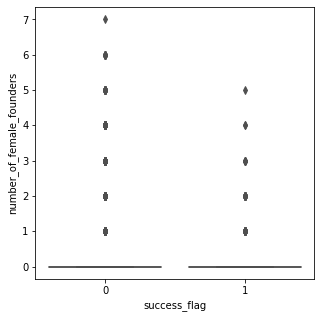

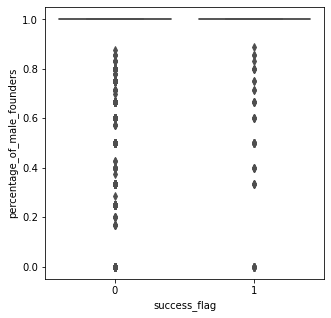

In [135]:
corr_params = ['number_of_founders',
               'number_of_male_founders',
               'number_of_female_founders',
               'percentage_of_male_founders']

generate_box_plots(corr_params, save_flag = True)

In [136]:
'''#Investor Aggregation

We count the number of investors each company has 

'''
temp = df_All_Companies_merged['investor_name'].values[:].tolist()
df_All_Companies_merged['number_of_investors'] = float('nan')

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    temp2 = temp[idx].count(',') + 1
    df_All_Companies_merged.at[idx, 'number_of_investors'] = temp[idx].count(',') + 1

'''Investor Success Metric

We for each investor we count the number of companies that they have invested in and how many of
those companies have been successful

list_all_investor_names_and_successes is a 2-d list. Each element of this list has the structure
[name of investor, number of successes, number of failures, fraction of success]

Lastly for each company, we take the average success rate of the investors that have invested in them

'''
list_all_investor_names_and_successes = [[x,0,0,0] for x in list_all_investor_names]
temp = df_All_Companies_merged['investor_name'].values[:].tolist()
df_All_Companies_merged['average_investor_success'] = float('nan')

for idx in range(len(temp)):
    if not isinstance(temp[idx], str): continue
    temp2 = temp[idx].split(',')
    for x in temp2:
        idx2 = list_all_investor_names.index(x)
        if df_All_Companies_merged.at[idx, 'success_flag'] == 1: list_all_investor_names_and_successes[idx2][1] += 1
        if df_All_Companies_merged.at[idx, 'success_flag'] == 0: list_all_investor_names_and_successes[idx2][2] += 1

for x in list_all_investor_names_and_successes: x[3] = x[1] / (x[1] + x[2])

for idx in range(len(temp)):
    if not isinstance(temp[idx], str): continue
    temp2 = temp[idx].split(',')
    count = len(temp2)
    running_sum = 0
    for x in temp2:
        idx2 = list_all_investor_names.index(x)
        running_sum += list_all_investor_names_and_successes[idx2][3]
    df_All_Companies_merged.at[idx, 'average_investor_success'] = running_sum / count

The correlation between Success and number_of_investors: 0.18070569959940375
The correlation between Success and average_investor_success: 0.7589064429889038


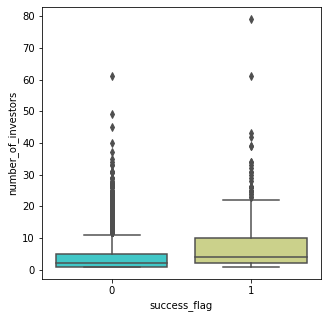

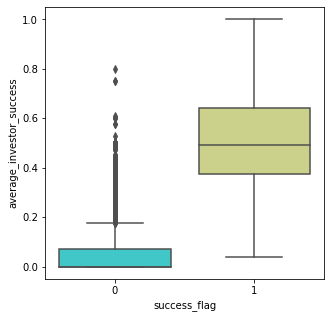

In [137]:
corr_params = ['number_of_investors',
               'average_investor_success']

generate_box_plots(corr_params, save_flag = True)

In [138]:
'''

This section is compose of three sections. 

First we look at the list of all the universities that the founders have attended and we will see look up the
ranking of that university. To begin,

list_all_universities_of_founders_rankings is a 2d list. The structure of each list in this list of lists are
[University name, University rank, university score]

The university names fields is taken from the data set of companies

Now we do sevarl matchin process to see if we have a rank for this university

1. See if founder university is in ranking table
2. Check if founder university is in ranking table when remove the key words 
'','university', 'University', 'university of', 'University of', 'University Of'
3. Use difflib.get_close_matches to get close matches of the University of the founders
4. Lastly, We see if the university on our ranking table is in the founders university list
if soo, the we assume we have a correct match

If a univeristy was not found then it was assigned a minimum rank of 1300
and a minimum score of 20

'''

default_value = -1
minumum_overall_score = 20
minumum_rank = 1300
list_all_universities_of_founders_rankings = [[x, default_value,default_value] for x in list_all_universities_of_founders]

#Most Accurate Matching
for idx1 in range(len(list_all_universities_of_founders)):
    for idx2 in range(len(df_University_Rankings['Institution_Name'].values[:])):
        if list_all_universities_of_founders[idx1] in df_University_Rankings['Institution_Name'].values[idx2]:
            list_all_universities_of_founders_rankings[idx1][1] = df_University_Rankings.at[idx2, 'RANK_2022']
            list_all_universities_of_founders_rankings[idx1][2] = df_University_Rankings.at[idx2, 'Overall']
         

removal_strings = ['','university', 'University', 'university of', 'University of', 'University Of']

for name in removal_strings:
    for idx1 in range(len(df_University_Rankings['Institution_Name'].values[:])):
        for idx2 in range(len(list_all_universities_of_founders)):        
            if df_University_Rankings['Institution_Name'].values[idx1].replace(name,'').strip() in list_all_universities_of_founders[idx2] and list_all_universities_of_founders_rankings[idx2][1] != default_value:
                list_all_universities_of_founders_rankings[idx2][1] = df_University_Rankings.at[idx1, 'RANK_2022']
                list_all_universities_of_founders_rankings[idx2][2] = df_University_Rankings.at[idx1, 'Overall']

for idx1 in range(len(list_all_universities_of_founders)):
    temp = difflib.get_close_matches(list_all_universities_of_founders[idx1],df_University_Rankings['Institution_Name'].values[:])
    if temp and list_all_universities_of_founders_rankings[idx2][1] != default_value:
        list_all_universities_of_founders_rankings[idx1][1] = df_University_Rankings.loc[df_University_Rankings['Institution_Name'] == temp[0], 'RANK_2022'].values[0]
        list_all_universities_of_founders_rankings[idx1][2] = df_University_Rankings.loc[df_University_Rankings['Institution_Name'] == temp[0], 'Overall'].values[0]

for name in removal_strings:
    for idx1 in range(len(df_University_Rankings['Institution_Name'].values[:])):
        temp = difflib.get_close_matches(df_University_Rankings['Institution_Name'].values[idx1].replace(name,'').strip(),list_all_universities_of_founders)
        for elem in temp: 
            idx2 = list_all_universities_of_founders.index(elem)
            if list_all_universities_of_founders_rankings[idx2][1] != default_value:
                list_all_universities_of_founders_rankings[idx1][1] = df_University_Rankings.at[idx1, 'RANK_2022']
                list_all_universities_of_founders_rankings[idx1][2] = df_University_Rankings.at[idx1, 'Overall']

for x in list_all_universities_of_founders_rankings:
    if x[1] == -1: 
        x[1] = minumum_rank
        x[2] = minumum_overall_score

In [139]:
'''#University ranking Aggregation


We assign a rank and score to the university of all of the founders
We save the best, worse and average rank and score of the universities of the founders

'''

temp = df_All_Companies_merged['universities_of_founders'].values[:]

df_All_Companies_merged['universities_of_founders_rankings'] = float('nan')
df_All_Companies_merged['universities_of_founders_rankings']  = df_All_Companies_merged['universities_of_founders_rankings'] .astype(object)
df_All_Companies_merged['best_ranking_universities_of_founders'] = float('nan')
df_All_Companies_merged['worse_ranking_university_of_founders'] = float('nan')
df_All_Companies_merged['average_ranking_university_of_founders'] = float('nan')
df_All_Companies_merged['percentage_of_founders_attended_university'] = float('nan')

df_All_Companies_merged['universities_of_founders_scores'] = float('nan')
df_All_Companies_merged['universities_of_founders_scores']  = df_All_Companies_merged['universities_of_founders_scores'] .astype(object)

df_All_Companies_merged['best_score_universities_of_founders'] = float('nan')
df_All_Companies_merged['worse_score_university_of_founders'] = float('nan')
df_All_Companies_merged['average_score_university_of_founders'] = float('nan')


for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    temp_university_names = temp[idx].split(',')
    number_of_universities = len(temp_university_names)
    temp_university_rankings = []
    temp_university_scores = []
    
    for university_name in temp_university_names:
        idx2 = list_all_universities_of_founders.index(university_name)
        temp_university_rankings.append(list_all_universities_of_founders_rankings[idx2][1])
        temp_university_scores.append(list_all_universities_of_founders_rankings[idx2][2])
    
    df_All_Companies_merged.at[idx, 'universities_of_founders_rankings'] = ','.join([str(elem) for elem in temp_university_rankings])
    df_All_Companies_merged.at[idx, 'best_ranking_universities_of_founders'] = np.min(np.array(temp_university_rankings))
    df_All_Companies_merged.at[idx, 'worse_ranking_university_of_founders'] = np.max(np.array(temp_university_rankings))
    df_All_Companies_merged.at[idx, 'average_ranking_university_of_founders'] = np.average(np.array(temp_university_rankings))
    
    df_All_Companies_merged.at[idx, 'percentage_of_founders_attended_university'] = number_of_universities / df_All_Companies_merged.at[idx, 'number_of_founders']
    
    df_All_Companies_merged.at[idx, 'universities_of_founders_scores'] = ','.join([str(elem) for elem in temp_university_scores])
    df_All_Companies_merged.at[idx, 'best_score_universities_of_founders'] = np.max(np.array(temp_university_scores))
    df_All_Companies_merged.at[idx, 'worse_score_university_of_founders'] = np.min(np.array(temp_university_scores))
    df_All_Companies_merged.at[idx, 'average_score_university_of_founders'] = np.average(np.array(temp_university_scores))
    

'''df_All_Companies_merged[['universities_of_founders_rankings','best_ranking_universities_of_founders',
                         'worse_ranking_university_of_founders','average_ranking_university_of_founders',
                         'percentage_of_founders_attended_university','universities_of_founders_scores',
                         'best_score_universities_of_founders','worse_score_university_of_founders',
                         'average_score_university_of_founders']]'''
print()

The correlation between Success and best_ranking_universities_of_founders: -0.05857600982552719
The correlation between Success and worse_ranking_university_of_founders: 0.02938222009796852
The correlation between Success and average_ranking_university_of_founders: -0.021973174333753894
The correlation between Success and percentage_of_founders_attended_university: 0.01697882661496033
The correlation between Success and best_score_universities_of_founders: 0.07831062523790133
The correlation between Success and worse_score_university_of_founders: -0.01707622961674412
The correlation between Success and average_score_university_of_founders: 0.034891122236989765


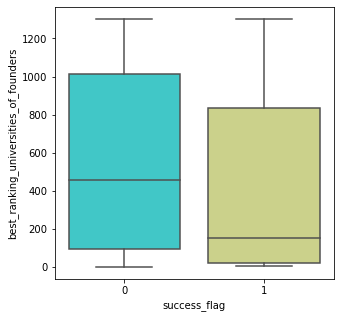

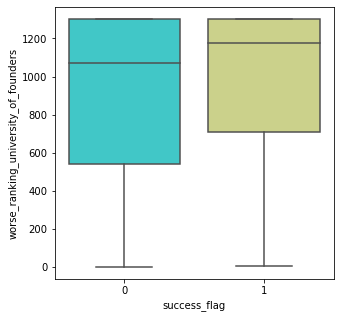

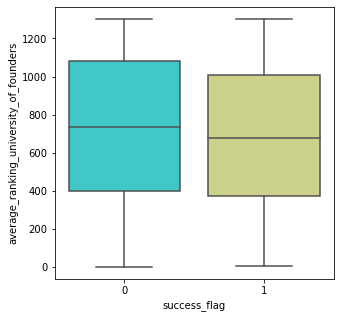

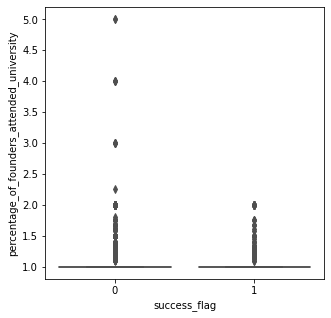

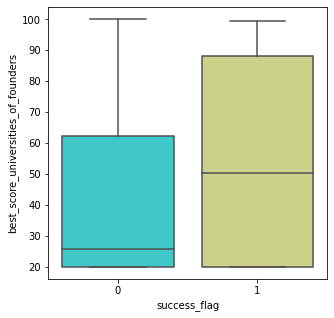

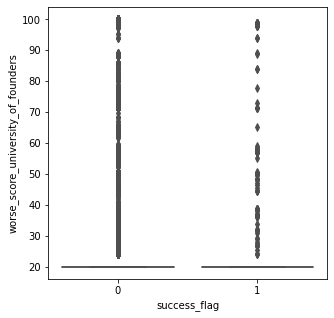

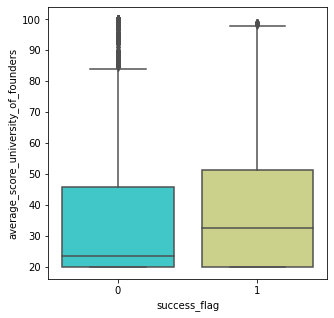

In [140]:
corr_params = ['best_ranking_universities_of_founders',
                         'worse_ranking_university_of_founders','average_ranking_university_of_founders',
                         'percentage_of_founders_attended_university',
                         'best_score_universities_of_founders','worse_score_university_of_founders',
                         'average_score_university_of_founders']

generate_box_plots(corr_params, save_flag = True)

In [141]:
'''
The data set 'degrees of founders (unedited).xlsx' was labeled by hand.

It was created by all of the degrees that the founders obtained and we normalised it to be either a Doctorate degree or
above, masters, bachelors, associates, highschool or unknown. We assume all founders have completed highschool

Once we have normalised the diversity of dergree title to one of these few categories we then assign a value to each one 
Doctorate is 4
Masters is 2
Bachelors is 1
Associate is 0.5
others are 0

These numbers are absolutely arbitrary. 


One we have standardised the degrees of the founders, we the compute the best degree, worse degree, average degree score
'''

df_highest_education_map = pd.read_excel (r'Data\degrees of founders (unedited).xlsx')
df_highest_education_map.drop(index = [0], inplace=True)
standardised_degree_list = ['Doctorate', 'Masters', 'Unknown', 'Associate', 'Bachelors', 'DroppedOut', 'HS']
standardised_degree_list_and_values = [['Doctorate', 4],
                                       ['Masters',2],
                                       ['Unknown', 0],
                                       ['Associate', 0.5],
                                       ['Bachelors', 1],
                                       ['DroppedOut', 0],
                                       ['HS', 0]]

#Average Education Ranking

temp = df_All_Companies_merged['degrees_of_founders'].values[:].tolist()

df_All_Companies_merged['degrees_of_founders_standardised'] = float('nan')
df_All_Companies_merged['degrees_of_founders_standardised']  = df_All_Companies_merged['degrees_of_founders_standardised'] .astype(object)
df_All_Companies_merged['degrees_of_founders_standardised_numbers'] = float('nan')
df_All_Companies_merged['degrees_of_founders_standardised_numbers']  = df_All_Companies_merged['degrees_of_founders_standardised_numbers'] .astype(object)
df_All_Companies_merged['best_degree_of_founders'] = float('nan')
df_All_Companies_merged['worse_degree_of_founders'] = float('nan')
df_All_Companies_merged['average_degree_of_founders'] = float('nan')
df_All_Companies_merged['percentage_of_founders_with_a_degree'] = float('nan')

exceptional_degree_names = ['','N/A','NA']

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    temp_degree_names = temp[idx].split(',')
    number_of_degrees = len(temp_degree_names)
    temp_degree_standardised = []
    temp_degree_standardised_score = []
    for degree_name in temp_degree_names:
        if degree_name in exceptional_degree_names:
            temporary = 'Unknown'
        else:
            temporary = df_highest_education_map.loc[df_highest_education_map['degrees'] == degree_name, 'degrees_standardised'].values[0]
        idx2 = standardised_degree_list.index(temporary)
        temp_degree_standardised.append(standardised_degree_list_and_values[idx2][0])
        temp_degree_standardised_score.append(standardised_degree_list_and_values[idx2][1])
    
    df_All_Companies_merged.at[idx, 'degrees_of_founders_standardised'] = ','.join([str(elem) for elem in temp_degree_standardised])
    df_All_Companies_merged.at[idx, 'degrees_of_founders_standardised_numbers'] = ','.join([str(elem) for elem in temp_degree_standardised_score])
    df_All_Companies_merged.at[idx, 'best_degree_of_founders'] = np.min(np.array(temp_degree_standardised_score))
    df_All_Companies_merged.at[idx, 'worse_degree_of_founders'] = np.max(np.array(temp_degree_standardised_score))
    df_All_Companies_merged.at[idx, 'average_degree_of_founders'] = np.average(np.array(temp_degree_standardised_score))
    
    df_All_Companies_merged.at[idx, 'percentage_of_founders_with_a_degree'] = number_of_degrees / df_All_Companies_merged.at[idx, 'number_of_founders']
    
'''df_All_Companies_merged[['degrees_of_founders_standardised','degrees_of_founders_standardised_numbers',
                         'best_degree_of_founders','worse_degree_of_founders',
                         'average_degree_of_founders','percentage_of_founders_with_a_degree']]'''
print()

The correlation between Success and best_degree_of_founders: -0.011926241264852264
The correlation between Success and worse_degree_of_founders: 0.09001687481981731
The correlation between Success and average_degree_of_founders: 0.046968456276478096
The correlation between Success and percentage_of_founders_with_a_degree: -0.017063766266395844


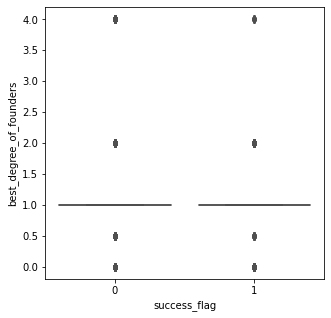

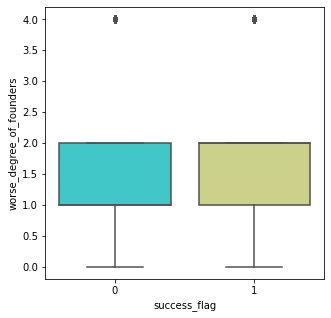

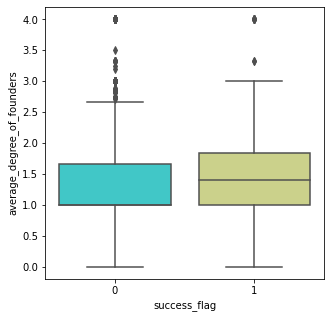

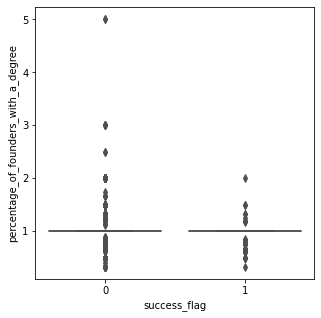

In [142]:
corr_params = ['best_degree_of_founders','worse_degree_of_founders',
                         'average_degree_of_founders','percentage_of_founders_with_a_degree']

generate_box_plots(corr_params, save_flag = True)

In [143]:
'''

Data preparation for percentage in Managerial positions

This code has been commented out but may be used again with new data. 

1. We take list_all_prev_title_of_founders and save it to an excel file.
2. The progam will then load this excel file, look throught the list of managerial titles
if there is a match then we give it a flag of 1
3. There is a list of sub managerial titles, if there is a match it is given a score of 0
4. The we label the rest of the data by hand, we label rubbish with a score of -1

WARNING, DO NOT RUN THE writer.save() line as THIS WILL OVERWRITE THE PREVIOUSLY LABELLED DATA

'''


'''

#df_all_prev_title_of_founders = pd.DataFrame(list_all_prev_title_of_founders, columns =['prev_title_of_founders'])
#writer = pd.ExcelWriter("Data\prev_title_of_founders (unedited).xlsx", engine='xlsxwriter')
#df_all_prev_title_of_founders.to_excel(writer,sheet_name = 'degrees', index=False)
#writer.save() 


list_of_managerial_titles = ['chief','chief executive officer',
                             'CEO', 'C.E.O', 'C.E.O.', 
                             'chief financial officer',
                             'CFO','C.F.O','C.F.O.',
                             'chief operating officer',
                             'COO','C.O.O','C.O.O.',
                             'chief information officer',
                             'CIO','C.I.O','C.I.O.',
                             'Chief Compliance Officer',
                             'CCO','C.C.O','C.C.O.',
                             'Chief Human Resources Manager',
                             'CHRM','C.H.R.M','C.H.R.M.',
                             'Chief Security Officer',
                             'CSO','C.S.O','C.S.O.',
                             'Chief Green Officer',
                             'CGO','C.G.O.','C.G.O',
                             'Chief Analytics Officer',
                             'CAO','C.A.O','C.A.O.',
                             'Chief Marketing Officer',
                             'CMO','C.M.O','C.M.O.',
                             'Chief Data Officer',
                             'CDO','C.D.O','C.D.O.',
                             'chief technology officer',
                             'cto', 'c.t.o', 'c.t.o.',
                             'manage', 'managing','manager',
                             'exec.', 'executive',
                             'founder','cofounder','co-founder',
                             'board', 'director', 'MD','M.D.',
                             'head', 'lead', 'leader','VP','V.P','V.P.', 'president',
                             'Owner', 'chair', 'principal', 'partner', 'architet']

list_of_sub_managerial_titles = ['Engineer', 'Associate', 'Analyst',
                                    'developer', 'specialist', 'investor']

df_all_prev_title_of_founders = pd.read_excel (r'Data\prev_title_of_founders (unedited).xlsx')
df_all_prev_title_of_founders['prev_title_of_founders_flag'] = np.nan

temp = df_all_prev_title_of_founders['prev_title_of_founders'].values
for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    for key_title in list_of_managerial_titles:
        if key_title.upper() in temp[idx].upper():
            df_all_prev_title_of_founders.at[idx, 'prev_title_of_founders_flag'] = 1


for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    for key_title in list_of_sub_managerial_titles:
        if key_title.upper() in temp[idx].upper() and df_all_prev_title_of_founders.at[idx, 'prev_title_of_founders_flag'] != 1:
            df_all_prev_title_of_founders.at[idx, 'prev_title_of_founders_flag'] = 0

            
#writer = pd.ExcelWriter("Data\prev_title_of_founders (unedited).xlsx", engine='xlsxwriter')
#df_all_prev_title_of_founders.to_excel(writer,sheet_name = 'degrees', index=False)
#writer.save() 
'''

print()

In [144]:
'''
The goal of this section is to infer a level of experience from the team. We count the number of previous
position held by the founding team, the number of those which have been managerial or greater. 

We also average against the number of founders

'''

df_all_prev_title_of_founders = pd.read_excel (r'Data\prev_title_of_founders (edited).xlsx')
df_All_Companies_merged.at[idx, 'number_of_founders']

temp = df_All_Companies_merged['prev_title_of_founders'].values[:].tolist()

df_All_Companies_merged['prev_title_of_founders_managerial_flag_collated'] = float('nan')
df_All_Companies_merged['prev_title_of_founders_managerial_flag_collated']  = df_All_Companies_merged['prev_title_of_founders_managerial_flag_collated'] .astype(object)
df_All_Companies_merged['number_of_prev_title_of_founders'] = float('nan')
df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] = float('nan')
df_All_Companies_merged['number_of_prev_title_of_founders_per_founder'] = float('nan')
df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_per_founder'] = float('nan')


exceptional_prev_title_names = ['','N/A','NA', 'n/a']

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    temp_prev_title_names = temp[idx].split(',')
    temp_prev_title_names = [x for x in temp_prev_title_names if not(x in exceptional_prev_title_names)]
    #print(temp_prev_title_names)
    
    number_of_prev_title_of_founders = len(temp_prev_title_names)
    temp_prev_title_of_founders_managerial_flag_collated = []
    
    for prev_title_names in temp_prev_title_names:
        
        try:
            temporary = df_all_prev_title_of_founders.loc[df_all_prev_title_of_founders['prev_title_of_founders'] == prev_title_names, 'prev_title_of_founders_flag'].values[0]
        except:
            print(prev_title_names)
            
        temp_prev_title_of_founders_managerial_flag_collated.append(temporary)
    
    df_All_Companies_merged.at[idx, 'prev_title_of_founders_managerial_flag_collated'] = ','.join([str(elem) for elem in temp_prev_title_of_founders_managerial_flag_collated])
    df_All_Companies_merged.at[idx, 'number_of_prev_title_of_founders'] = len([x for x in temp_prev_title_of_founders_managerial_flag_collated if x != -1])
    df_All_Companies_merged.at[idx, 'managerial_flag_number_of_prev_title_of_founders'] = len([x for x in temp_prev_title_of_founders_managerial_flag_collated if x == 1])
    df_All_Companies_merged.at[idx, 'number_of_prev_title_of_founders_per_founder'] = len([x for x in temp_prev_title_of_founders_managerial_flag_collated if x != -1]) / df_All_Companies_merged.at[idx, 'number_of_founders']
    df_All_Companies_merged.at[idx, 'managerial_flag_number_of_prev_title_of_founders_per_founder'] = len([x for x in temp_prev_title_of_founders_managerial_flag_collated if x == 1]) / df_All_Companies_merged.at[idx, 'number_of_founders']
    
'''df_All_Companies_merged[['prev_title_of_founders','prev_title_of_founders_managerial_flag_collated','number_of_prev_title_of_founders',
                         'managerial_flag_number_of_prev_title_of_founders','number_of_prev_title_of_founders_per_founder',
                         'managerial_flag_number_of_prev_title_of_founders_per_founder']]'''
print()

The correlation between Success and number_of_prev_title_of_founders: 0.1589827295863771
The correlation between Success and managerial_flag_number_of_prev_title_of_founders: 0.16444551445009586
The correlation between Success and number_of_prev_title_of_founders_per_founder: 0.03200681063423862
The correlation between Success and managerial_flag_number_of_prev_title_of_founders_per_founder: 0.029359896676353036


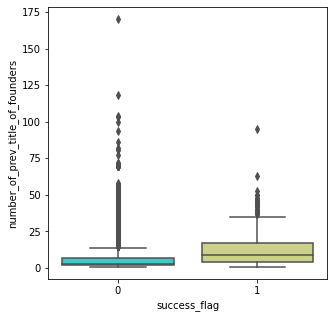

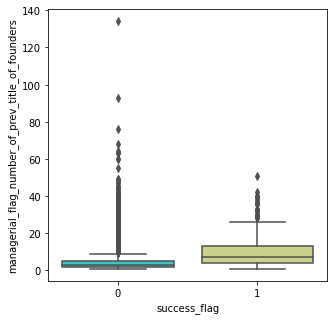

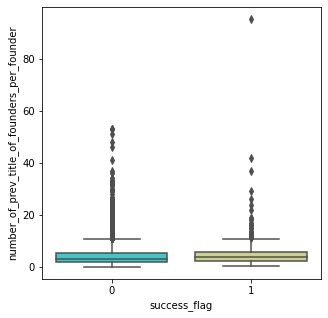

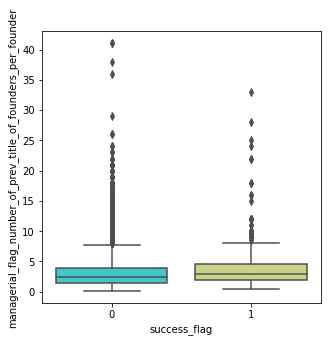

In [145]:
corr_params = ['number_of_prev_title_of_founders','managerial_flag_number_of_prev_title_of_founders',
                         'number_of_prev_title_of_founders_per_founder','managerial_flag_number_of_prev_title_of_founders_per_founder']

generate_box_plots(corr_params, save_flag = True)

In [146]:
'''
Connectedness factor

This is in some sense to try to infer how much does the founding team know each other

We will count how many of the founders went to the same university

'''
temp = df_All_Companies_merged['universities_of_founders'].values[:].tolist()

df_All_Companies_merged['founders_connectedness_factor_based_on_university'] = float('nan')

exceptional_prev_university_names = ['','N/A','NA', 'n/a']

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
            
    temp_prev_university_names = temp[idx].split(',')
    temp_prev_university_names = [x.upper().strip() for x in temp_prev_university_names if not(x in exceptional_prev_university_names)]

    temp_prev_university_names_counter = [temp_prev_university_names.count(x) for x in temp_prev_university_names]
    temp_prev_university_names_counter = np.array(temp_prev_university_names_counter) - 1
    
    if (df_All_Companies_merged.at[idx, 'number_of_founders'] != 1): df_All_Companies_merged.at[idx, 'founders_connectedness_factor_based_on_university'] = np.max(temp_prev_university_names_counter) / (df_All_Companies_merged.at[idx, 'number_of_founders'] - 1) 

'''df_All_Companies_merged[['universities_of_founders','founders_connectedness_factor_based_on_university']]'''
print()

The correlation between Success and founders_connectedness_factor_based_on_university: 0.04212842814402867


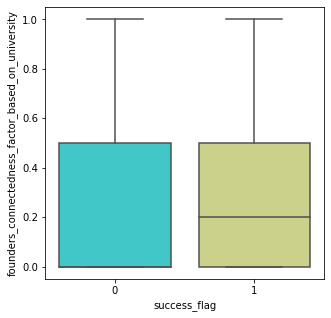

In [147]:
corr_params = ['founders_connectedness_factor_based_on_university']
generate_box_plots(corr_params, save_flag = True)

[0.04145077720207254, 0.041501976284584984, 0.03945111492281304, 0.0379746835443038, 0.0423728813559322, 0.046536796536796536, 0.053169119855812554, 0.04808057772709996]


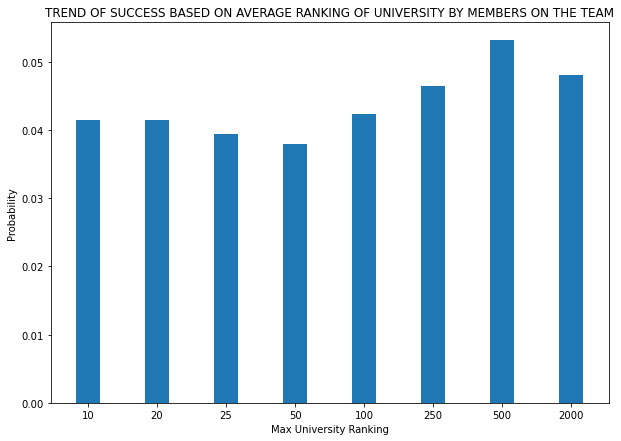

In [148]:
boundaries = [10, 20, 25, 50, 100, 250, 500, 2000]
bar_plot_data = [len(df_All_Companies_merged['average_ranking_university_of_founders'][(np.isnan(df_All_Companies_merged['average_ranking_university_of_founders']) == False) & (df_All_Companies_merged['average_ranking_university_of_founders'] <= rank) & (df_All_Companies_merged['success_flag'] == 1)])/ len(df_All_Companies_merged['average_ranking_university_of_founders'][(np.isnan(df_All_Companies_merged['average_ranking_university_of_founders']) == False) & (df_All_Companies_merged['average_ranking_university_of_founders'] <= rank)]) for rank in boundaries]
print(bar_plot_data)

ind = np.arange(len(boundaries))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Max University Ranking')
plt.title('TREND OF SUCCESS BASED ON AVERAGE RANKING OF UNIVERSITY BY MEMBERS ON THE TEAM')
plt.xticks(ind, boundaries)
plt.savefig(r'Figures\average_ranking_university_of_founders_success_trend.png')
plt.show()

[1296, 1632, 1813, 2311, 2716, 4322, 5540, 10524]


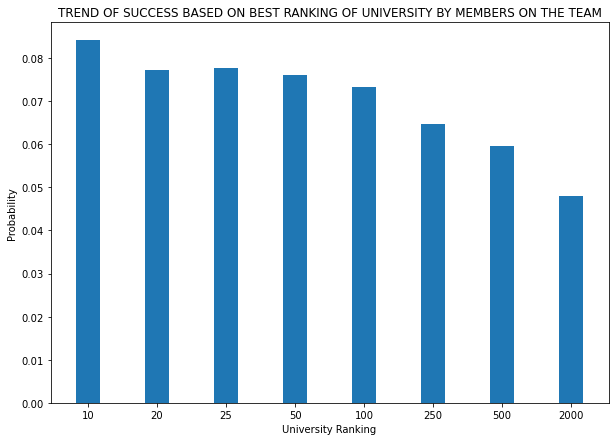

In [149]:
boundaries = [10, 20, 25, 50, 100, 250, 500, 2000]
bar_plot_data_1 = [len(df_All_Companies_merged['best_ranking_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders']) == False) & (df_All_Companies_merged['best_ranking_universities_of_founders'] <= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries]
bar_plot_data_2 = [len(df_All_Companies_merged['best_ranking_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders']) == False) & (df_All_Companies_merged['best_ranking_universities_of_founders'] <= rank)]) for rank in boundaries]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('University Ranking')
plt.title('TREND OF SUCCESS BASED ON BEST RANKING OF UNIVERSITY BY MEMBERS ON THE TEAM')
plt.xticks(ind, boundaries)
plt.savefig(r'Figures\best_ranking_universities_of_founders_success_trend.png')
plt.show()

[10345, 8456, 1549, 266]


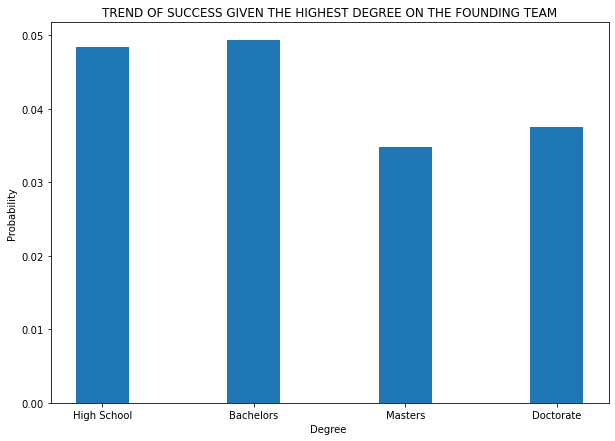

In [150]:
boundaries = [0,1,2,3]
bar_plot_data_1 = [len(df_All_Companies_merged['best_degree_of_founders'][(np.isnan(df_All_Companies_merged['best_degree_of_founders']) == False) & (df_All_Companies_merged['best_degree_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries]
bar_plot_data_2 = [len(df_All_Companies_merged['best_degree_of_founders'][(np.isnan(df_All_Companies_merged['best_degree_of_founders']) == False) & (df_All_Companies_merged['best_degree_of_founders'] >= rank)]) for rank in boundaries]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Degree ')
plt.title('TREND OF SUCCESS GIVEN THE HIGHEST DEGREE ON THE FOUNDING TEAM')
plt.xticks(ind, ['High School', 'Bachelors', 'Masters', 'Doctorate'])
plt.savefig(r'Figures\best_degree_of_founders_success_trend.png')
plt.show()

[0.04842919284678589, 0.051011335852411646, 0.05291005291005291, 0.057441253263707574]


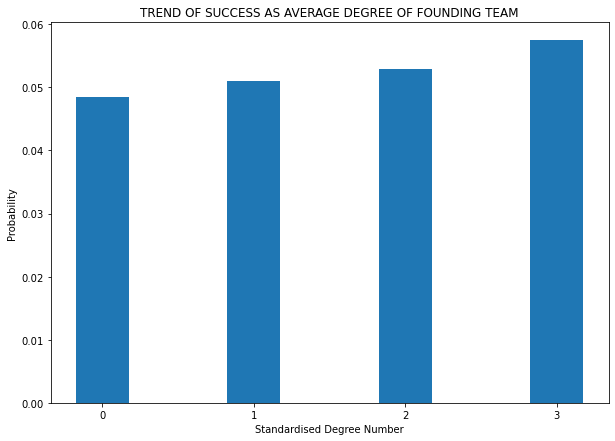

In [151]:
boundaries = [0,1,2,3]
bar_plot_data = [len(df_All_Companies_merged['average_degree_of_founders'][(np.isnan(df_All_Companies_merged['average_degree_of_founders']) == False) & (df_All_Companies_merged['average_degree_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)])/ len(df_All_Companies_merged['average_degree_of_founders'][(np.isnan(df_All_Companies_merged['average_degree_of_founders']) == False) & (df_All_Companies_merged['average_degree_of_founders'] >= rank)]) for rank in boundaries]
print(bar_plot_data)

ind = np.arange(len(boundaries))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Standardised Degree Number')
plt.title('TREND OF SUCCESS AS AVERAGE DEGREE OF FOUNDING TEAM')
plt.xticks(ind, boundaries)
plt.savefig(r'Figures\average_degree_of_founders_success_trend.png')
plt.show()

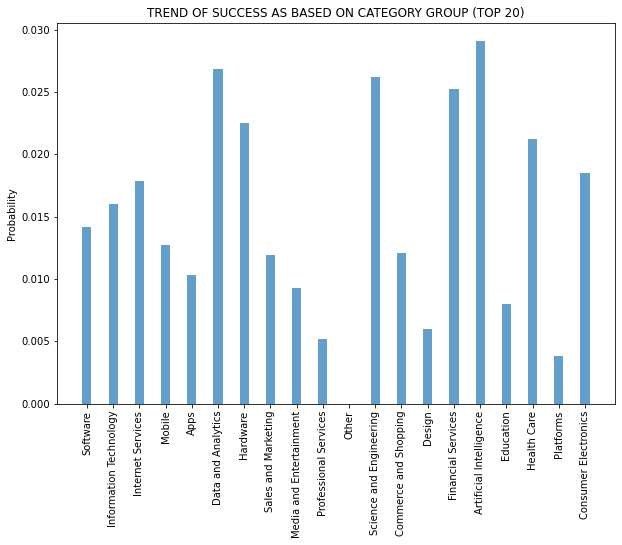

In [152]:
names = [x[1] for x in list_all_category_groups_and_count[:20]]
bar_plot_data_1 = [0 for x in list_all_category_groups_and_count[:20]]
bar_plot_data_2 = [0 for x in list_all_category_groups_and_count[:20]]

temp = df_All_Companies_merged['category_groups_list'].values[:]
list_all_category_groups_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    for idx2 in range(len(names)):
        if names[idx2] in temp[idx]:
            bar_plot_data_2[idx2] += 1
            if df_All_Companies_merged.at[idx, 'success_flag'] == 1:
                bar_plot_data_1[idx2] += 1

ind = np.arange(len(names))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, np.array(bar_plot_data_1) / np.array(bar_plot_data_2), width,alpha=0.7,)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS AS BASED ON CATEGORY GROUP (TOP 20)')
plt.xticks(ind, names)
plt.xticks(rotation=90)
plt.savefig(r'Figures\category_group_success_trend.png')
plt.show()

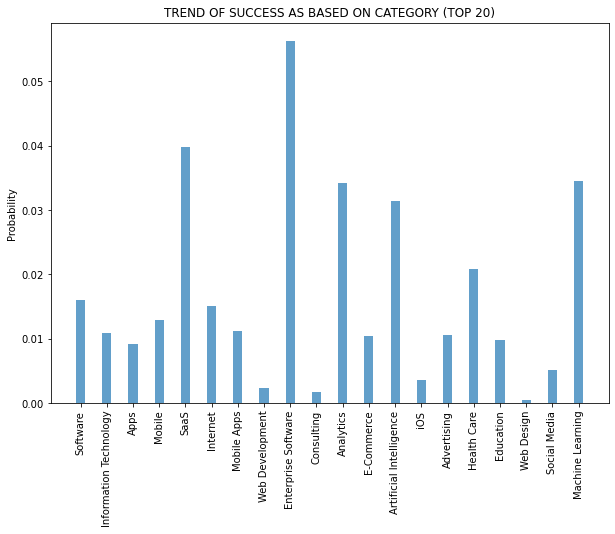

In [153]:
names = [x[1] for x in list_all_categories_and_count[:20]]
bar_plot_data_1 = [0 for x in list_all_categories_and_count[:20]]
bar_plot_data_2 = [0 for x in list_all_categories_and_count[:20]]

temp = df_All_Companies_merged['category_list'].values[:]
list_all_categories_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    for idx2 in range(len(names)):
        if names[idx2] in temp[idx]:
            bar_plot_data_2[idx2] += 1
            if df_All_Companies_merged.at[idx, 'success_flag'] == 1:
                bar_plot_data_1[idx2] += 1

ind = np.arange(len(names))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, np.array(bar_plot_data_1) / np.array(bar_plot_data_2), width,alpha=0.7,)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS AS BASED ON CATEGORY (TOP 20)')
plt.xticks(ind, names)
plt.xticks(rotation=90)
plt.savefig(r'Figures\category_success_trend.png')
 
plt.show()

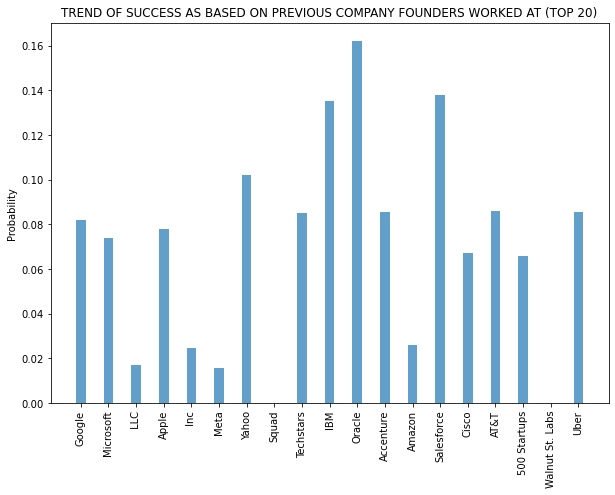

In [154]:
names = [x[1] for x in list_all_prev_companies_of_founders_and_count[1:20]]
bar_plot_data_1 = [0 for x in list_all_prev_companies_of_founders_and_count[1:20]]
bar_plot_data_2 = [0 for x in list_all_prev_companies_of_founders_and_count[1:20]]

temp = df_All_Companies_merged['prev_companies_of_founders'].values[:]
list_all_prev_companies_of_founders_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    for idx2 in range(len(names)):
        if names[idx2] in str(temp[idx]):
            bar_plot_data_2[idx2] += 1
            if df_All_Companies_merged.at[idx, 'success_flag'] == 1:
                bar_plot_data_1[idx2] += 1

ind = np.arange(len(names))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, np.array(bar_plot_data_1) / np.array(bar_plot_data_2), width,alpha=0.7,)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS AS BASED ON PREVIOUS COMPANY FOUNDERS WORKED AT (TOP 20)')
plt.xticks(ind, names)
plt.xticks(rotation=90)
plt.savefig(r'Figures\previous_company_success_trend.png')
plt.show()

In [155]:
'''

Checks if the company that the founder previously worked at was publically traded. 

This did not offer promising results 


'''
temp = df_All_Companies_merged['prev_companies_of_founders'].values[:]

df_All_Companies_merged['prev_companies_of_founders_publically_traded_flags'] = float('nan')
df_All_Companies_merged['prev_companies_of_founders_publically_traded_flags']  = df_All_Companies_merged['prev_companies_of_founders_publically_traded_flags'] .astype(object)
df_All_Companies_merged['number_of_prev_companies_of_founders_publically_traded'] = float('nan')


exceptional_prev_companies_of_founders_names = ['','N/A','NA', ' Inc.']

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    temp_prev_companies_of_founders_names = str(temp[idx]).split(',')
    temp_prev_companies_of_founders_names = [x.upper().strip().upper() for x in temp_prev_companies_of_founders_names if not(x in exceptional_prev_companies_of_founders_names)]
    
    temp_prev_companies_of_founders_is_publically_traded_flag = []
    
    for prev_companies_of_founders_name in temp_prev_companies_of_founders_names:
        if prev_companies_of_founders_name in list_of_allpublically_listed_companies:
            temp_prev_companies_of_founders_is_publically_traded_flag.append(1)
        else:
            temp_prev_companies_of_founders_is_publically_traded_flag.append(0)
    
    df_All_Companies_merged.at[idx, 'prev_companies_of_founders_publically_traded_flags'] = ','.join([str(elem) for elem in temp_prev_companies_of_founders_is_publically_traded_flag])
    df_All_Companies_merged.at[idx, 'number_of_prev_companies_of_founders_publically_traded'] = np.sum(np.array(temp_prev_companies_of_founders_is_publically_traded_flag))
    
'''df_All_Companies_merged[['prev_companies_of_founders_publically_traded_flags','number_of_prev_companies_of_founders_publically_traded']]'''

print()

# Data Categorisation

# Grouping of Data
All of the previous analysis shows us some signals that increase the success of a company. Using these signals, we shall now aggregate the data in the following way to reduce it's dimension for better training.

1. We shall group people where atleast one of the founders that went to top 10, top 25, top 50, and rest usiversities together and give them the flags 3,2,1,0 respectively

2. We shall also have a flag if a team went to a top 10 univerisity or not. This will be denoted by a 1 or 0.

3. WE SHALL REPEAT STEP 1 AND 2 WITH NUMBER OF INVERTORS AND THE SUCCESS RATE OF THE INVESTORS

The correlation between Success and best_ranking_universities_of_founders_grouping_scaling: 0.07724046553777279
The correlation between Success and best_ranking_universities_of_founders: -0.05857600982552719
[1803, 3591, 5341, 10524]


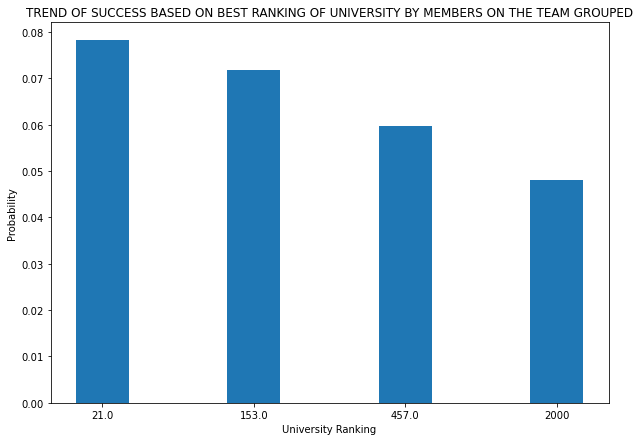

In [156]:
best_ranking_universities_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['best_ranking_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)] , [25, 50, 75]))
best_ranking_universities_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['best_ranking_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)] , [25, 50, 75]))
df_All_Companies_merged['best_ranking_universities_of_founders_grouping_scaling'] = float('nan')

boundaries = [0, 
              best_ranking_universities_of_founders_success_quantiles[0], 
              best_ranking_universities_of_founders_success_quantiles[1], 
              best_ranking_universities_of_founders_unsuccessful_quantiles[1],
              2000]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['best_ranking_universities_of_founders'] <= boundaries[idx + 1]) & ( df_All_Companies_merged['best_ranking_universities_of_founders'] > boundaries[idx]) ,'best_ranking_universities_of_founders_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['best_ranking_universities_of_founders_grouping_scaling','best_ranking_universities_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['best_ranking_universities_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['best_ranking_universities_of_founders'] <= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['best_ranking_universities_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['best_ranking_universities_of_founders'] <= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('University Ranking')
plt.title('TREND OF SUCCESS BASED ON BEST RANKING OF UNIVERSITY BY MEMBERS ON THE TEAM GROUPED')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\best_ranking_universities_of_founders_grouping_scaling.png')
plt.show()

The correlation between Success and best_ranking_universities_of_founders_binary_grouping_scaling: 0.06402058051909824
The correlation between Success and best_ranking_universities_of_founders: -0.05857600982552719
[1803, 10524]


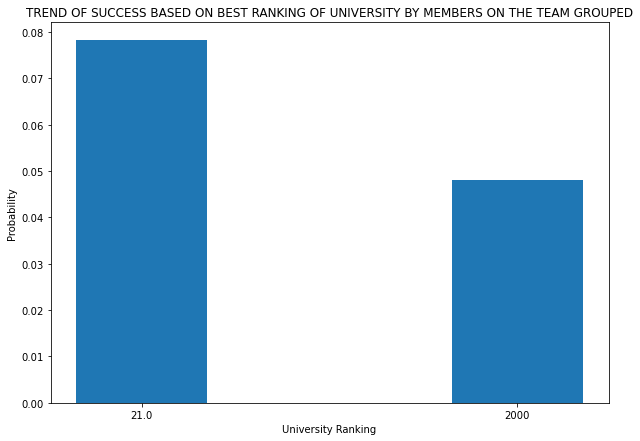

In [157]:
#Binary grouping based on best quantile of of success
best_ranking_universities_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['best_ranking_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)] , [25, 50, 75]))
best_ranking_universities_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['best_ranking_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)] , [25, 50, 75]))

df_All_Companies_merged['best_ranking_universities_of_founders_binary_grouping_scaling'] = float('nan')

boundaries = [0, 
              best_ranking_universities_of_founders_success_quantiles[0],
              2000]
grouping_scale = [1,0]

for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['best_ranking_universities_of_founders'] <= boundaries[idx + 1]) & ( df_All_Companies_merged['best_ranking_universities_of_founders'] > boundaries[idx]) ,'best_ranking_universities_of_founders_binary_grouping_scaling'] = grouping_scale[idx]


corr_params = ['best_ranking_universities_of_founders_binary_grouping_scaling','best_ranking_universities_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))
    
bar_plot_data_1 = [len(df_All_Companies_merged['best_ranking_universities_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['best_ranking_universities_of_founders'] <= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['best_ranking_universities_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['best_ranking_universities_of_founders'] <= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('University Ranking')
plt.title('TREND OF SUCCESS BASED ON BEST RANKING OF UNIVERSITY BY MEMBERS ON THE TEAM GROUPED')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\best_ranking_universities_of_founders_binary_grouping_scaling.png')
plt.show()

The correlation between Success and average_degree_of_founders_grouping_scaling: 0.04132425570983153
The correlation between Success and average_degree_of_founders: 0.046968456276478096
[2300, 4195, 8998, 10345]


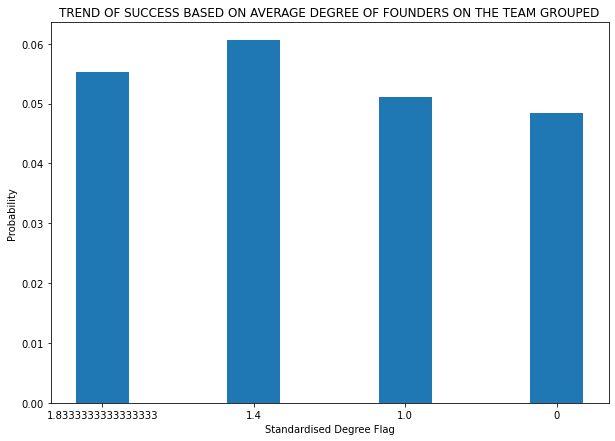

In [158]:
#Average degree of founders success
average_degree_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['average_degree_of_founders'][(np.isnan(df_All_Companies_merged['average_degree_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)] , [25, 50, 75]))
average_degree_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['average_degree_of_founders'][(np.isnan(df_All_Companies_merged['average_degree_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)] , [25, 50, 75]))
df_All_Companies_merged['average_degree_of_founders_grouping_scaling'] = float('nan')

boundaries = [4.1, 
              average_degree_of_founders_success_quantiles[2], 
              average_degree_of_founders_success_quantiles[1], 
              average_degree_of_founders_unsuccessful_quantiles[1],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['average_degree_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['average_degree_of_founders'] < boundaries[idx]) ,'average_degree_of_founders_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['average_degree_of_founders_grouping_scaling','average_degree_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['average_degree_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_degree_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['average_degree_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['average_degree_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_degree_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['average_degree_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Standardised Degree Flag')
plt.title('TREND OF SUCCESS BASED ON AVERAGE DEGREE OF FOUNDERS ON THE TEAM GROUPED')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\average_degree_of_founders_grouping_scaling.png')
plt.show()

The correlation between Success and average_degree_of_founders_binary_grouping_scaling: 0.046625539212326615
The correlation between Success and average_degree_of_founders: 0.046968456276478096
[4195, 10345]


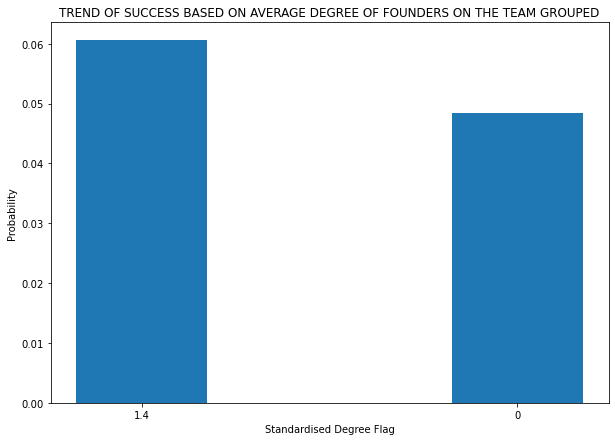

In [159]:
#BINARY GROUPING OF AVERAGE DEGREE OF FOUNDERS
average_degree_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['average_degree_of_founders'][(np.isnan(df_All_Companies_merged['average_degree_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)] , [25, 50, 75]))
average_degree_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['average_degree_of_founders'][(np.isnan(df_All_Companies_merged['average_degree_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)] , [25, 50, 75]))
df_All_Companies_merged['average_degree_of_founders_binary_grouping_scaling'] = float('nan')

boundaries = [4.1, 
              average_degree_of_founders_success_quantiles[1], 
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['average_degree_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['average_degree_of_founders'] < boundaries[idx]) ,'average_degree_of_founders_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['average_degree_of_founders_binary_grouping_scaling','average_degree_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['average_degree_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_degree_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['average_degree_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['average_degree_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_degree_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['average_degree_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Standardised Degree Flag')
plt.title('TREND OF SUCCESS BASED ON AVERAGE DEGREE OF FOUNDERS ON THE TEAM GROUPED')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\average_degree_of_founders_binary_grouping_scaling.png')
plt.show()

The correlation between Success and number_of_investors_grouping_scaling: 0.15203995736467218
The correlation between Success and number_of_investors: 0.18070569959940375
[916, 2944, 5228, 8303]


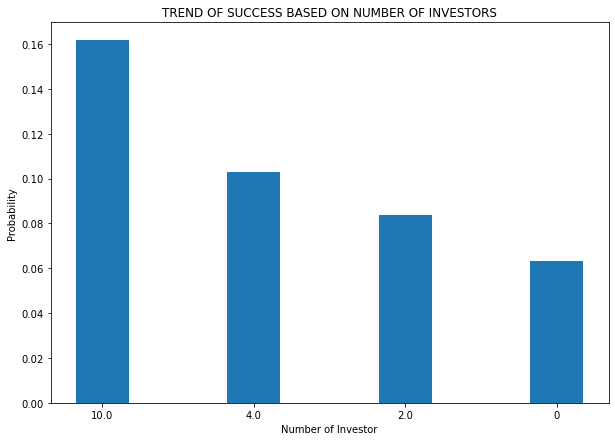

In [160]:
#Number of investors grouping
number_of_investors_success_quantiles = (np.percentile(df_All_Companies_merged['number_of_investors'][(np.isnan(df_All_Companies_merged['number_of_investors']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
number_of_investors_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['number_of_investors'][(np.isnan(df_All_Companies_merged['number_of_investors']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['number_of_investors_grouping_scaling'] = float('nan')

boundaries = [number_of_investors_success_quantiles[4] + 1, 
              number_of_investors_success_quantiles[3], 
              number_of_investors_success_quantiles[2], 
              number_of_investors_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['number_of_investors'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['number_of_investors'] < boundaries[idx]) ,'number_of_investors_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['number_of_investors_grouping_scaling','number_of_investors']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['number_of_investors_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_investors_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_investors'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['number_of_investors_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_investors_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_investors'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Number of Investor')
plt.title('TREND OF SUCCESS BASED ON NUMBER OF INVESTORS')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\number_of_investors_grouping_scaling.png')
plt.show()

The correlation between Success and number_of_investors_binary_grouping_scaling: 0.14228976927884093
The correlation between Success and number_of_investors: 0.18070569959940375
[916, 8303]


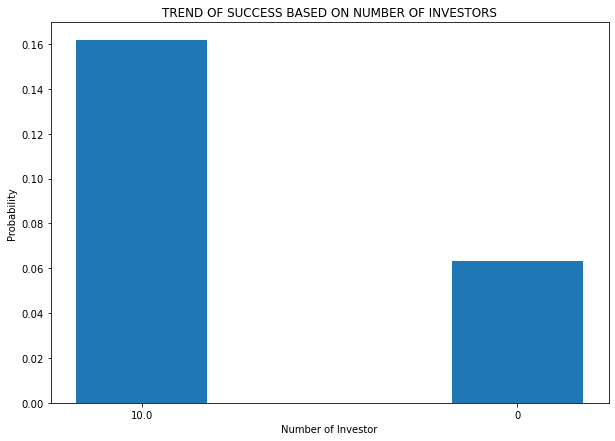

In [161]:
#Number of investors binary grouping
number_of_investors_success_quantiles = (np.percentile(df_All_Companies_merged['number_of_investors'][(np.isnan(df_All_Companies_merged['number_of_investors']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
number_of_investors_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['number_of_investors'][(np.isnan(df_All_Companies_merged['number_of_investors']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['number_of_investors_binary_grouping_scaling'] = float('nan')

boundaries = [number_of_investors_success_quantiles[4] + 1, 
              number_of_investors_success_quantiles[3], 
              0]
grouping_scale = [1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['number_of_investors'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['number_of_investors'] < boundaries[idx]) ,'number_of_investors_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['number_of_investors_binary_grouping_scaling','number_of_investors']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['number_of_investors_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_investors_binary_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_investors'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['number_of_investors_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_investors_binary_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_investors'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Number of Investor')
plt.title('TREND OF SUCCESS BASED ON NUMBER OF INVESTORS')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\number_of_investors_binary_grouping_scaling.png')
plt.show()

The correlation between Success and number_of_founders_grouping_scaling: 0.14334447250125357
The correlation between Success and number_of_founders: 0.1567136540475303
[1396, 2761, 5727, 10512]


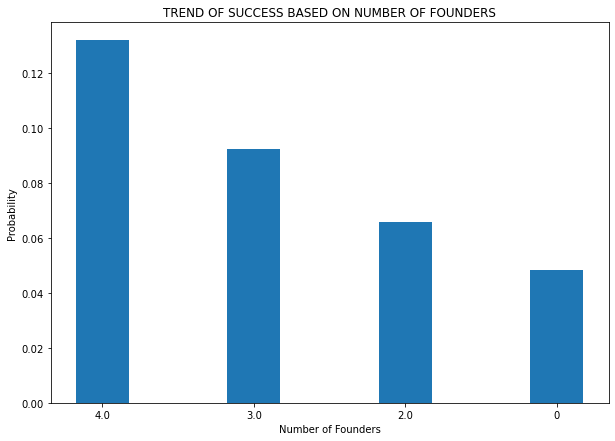

In [162]:
#Number of founders grouping
number_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['number_of_founders'][(np.isnan(df_All_Companies_merged['number_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
number_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['number_of_founders'][(np.isnan(df_All_Companies_merged['number_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['number_of_founders_grouping_scaling'] = float('nan')

boundaries = [number_of_founders_success_quantiles[4] + 1, 
              number_of_founders_success_quantiles[3], 
              number_of_founders_success_quantiles[2], 
              number_of_founders_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['number_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['number_of_founders'] < boundaries[idx]) ,'number_of_founders_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['number_of_founders_grouping_scaling','number_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))  

bar_plot_data_1 = [len(df_All_Companies_merged['number_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['number_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Number of Founders')
plt.title('TREND OF SUCCESS BASED ON NUMBER OF FOUNDERS')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\number_of_founders_grouping_scaling.png')
plt.show()

The correlation between Success and number_of_founders_binary_grouping_scaling: 0.15296376786112098
The correlation between Success and number_of_founders: 0.1567136540475303
[1396, 10512]


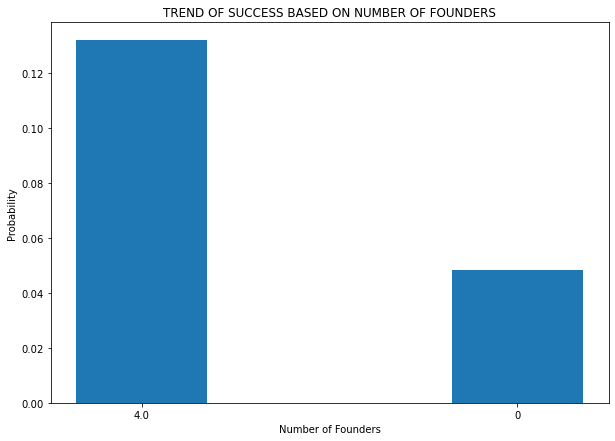

In [163]:
#Number of founders binary grouping
number_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['number_of_founders'][(np.isnan(df_All_Companies_merged['number_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
number_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['number_of_founders'][(np.isnan(df_All_Companies_merged['number_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['number_of_founders_binary_grouping_scaling'] = float('nan')

boundaries = [number_of_founders_success_quantiles[4] + 1, 
              number_of_founders_success_quantiles[3], 
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['number_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['number_of_founders'] < boundaries[idx]) ,'number_of_founders_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['number_of_founders_binary_grouping_scaling','number_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['number_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['number_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Number of Founders')
plt.title('TREND OF SUCCESS BASED ON NUMBER OF FOUNDERS')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\number_of_founders_binary_grouping_scaling.png') 
plt.show()

The correlation between Success and number_of_prev_title_of_founders_grouping_scaling: 0.1566621661460183
The correlation between Success and number_of_prev_title_of_founders: 0.1589827295863771
[1211, 3921, 12437, 20450]


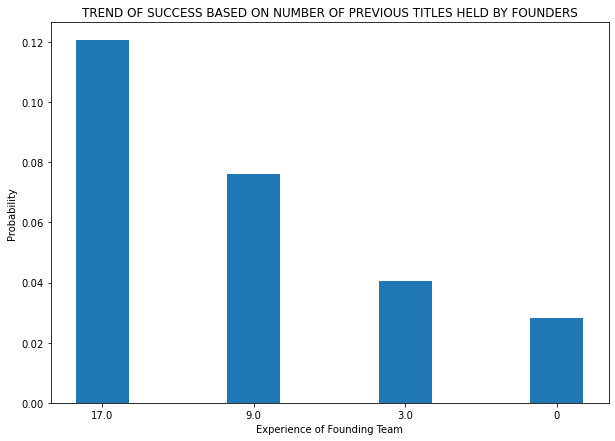

In [164]:
#Number of previous titles of founders grouping
number_of_prev_title_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
number_of_prev_title_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['number_of_prev_title_of_founders_grouping_scaling'] = float('nan')

boundaries = [number_of_prev_title_of_founders_success_quantiles[4] + 1, 
              number_of_prev_title_of_founders_success_quantiles[3], 
              number_of_prev_title_of_founders_success_quantiles[2], 
              number_of_prev_title_of_founders_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['number_of_prev_title_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['number_of_prev_title_of_founders'] < boundaries[idx]) ,'number_of_prev_title_of_founders_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['number_of_prev_title_of_founders_grouping_scaling','number_of_prev_title_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2))) 

bar_plot_data_1 = [len(df_All_Companies_merged['number_of_prev_title_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_prev_title_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['number_of_prev_title_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_prev_title_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Experience of Founding Team')
plt.title('TREND OF SUCCESS BASED ON NUMBER OF PREVIOUS TITLES HELD BY FOUNDERS')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\number_of_prev_title_of_founders_grouping_scaling.png') 
plt.show()

The correlation between Success and number_of_prev_title_of_founders_binary_grouping_scaling: 0.14030273146330557
The correlation between Success and number_of_prev_title_of_founders: 0.1589827295863771
[1211, 20450]


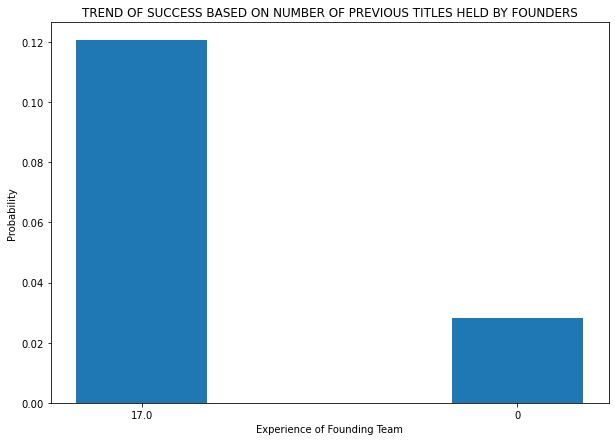

In [165]:
#Number of previous titles of founders binary grouping
number_of_prev_title_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
number_of_prev_title_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['number_of_prev_title_of_founders_binary_grouping_scaling'] = float('nan')

boundaries = [number_of_prev_title_of_founders_success_quantiles[4] + 1, 
              number_of_prev_title_of_founders_success_quantiles[3], 
              0]
grouping_scale = [1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['number_of_prev_title_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['number_of_prev_title_of_founders'] < boundaries[idx]) ,'number_of_prev_title_of_founders_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['number_of_prev_title_of_founders_binary_grouping_scaling','number_of_prev_title_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['number_of_prev_title_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_prev_title_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['number_of_prev_title_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_prev_title_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Experience of Founding Team')
plt.title('TREND OF SUCCESS BASED ON NUMBER OF PREVIOUS TITLES HELD BY FOUNDERS')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\number_of_prev_title_of_founders_binary_grouping_scaling.png') 
plt.show()

The correlation between Success and managerial_flag_number_of_prev_title_of_founders_grouping_scaling: 0.15775010015399835
The correlation between Success and managerial_flag_number_of_prev_title_of_founders: 0.16444551445009586
[1135, 4076, 11452, 20445]


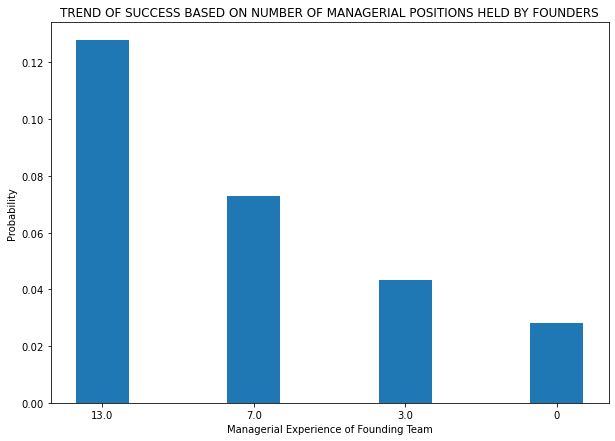

In [166]:
#Number of previous managerial titles of founders grouping
managerial_flag_number_of_prev_title_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
managerial_flag_number_of_prev_title_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_grouping_scaling'] = float('nan')

boundaries = [managerial_flag_number_of_prev_title_of_founders_success_quantiles[4] + 1, 
              managerial_flag_number_of_prev_title_of_founders_success_quantiles[3], 
              managerial_flag_number_of_prev_title_of_founders_success_quantiles[2], 
              managerial_flag_number_of_prev_title_of_founders_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] < boundaries[idx]) ,'managerial_flag_number_of_prev_title_of_founders_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['managerial_flag_number_of_prev_title_of_founders_grouping_scaling','managerial_flag_number_of_prev_title_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Managerial Experience of Founding Team')
plt.title('TREND OF SUCCESS BASED ON NUMBER OF MANAGERIAL POSITIONS HELD BY FOUNDERS')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\managerial_flag_number_of_prev_title_of_founders_grouping_scaling.png')
plt.show()

The correlation between Success and managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling: 0.14609895898695893
The correlation between Success and managerial_flag_number_of_prev_title_of_founders: 0.16444551445009586
[1135, 20445]


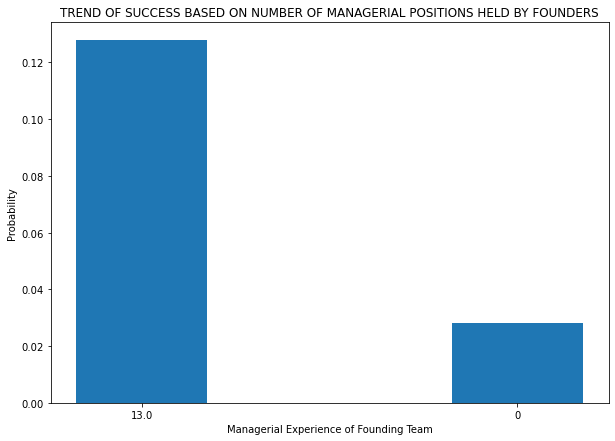

In [167]:
#Number of previous managerial titles of founders binary grouping
managerial_flag_number_of_prev_title_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
managerial_flag_number_of_prev_title_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling'] = float('nan')

boundaries = [managerial_flag_number_of_prev_title_of_founders_success_quantiles[4] + 1, 
              managerial_flag_number_of_prev_title_of_founders_success_quantiles[3], 
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] < boundaries[idx]) ,'managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling','managerial_flag_number_of_prev_title_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))


bar_plot_data_1 = [len(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Managerial Experience of Founding Team')
plt.title('TREND OF SUCCESS BASED ON NUMBER OF MANAGERIAL POSITIONS HELD BY FOUNDERS')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling.png')
plt.show()

The correlation between Success and average_investor_success_grouping_scaling: 0.6313147594849973
The correlation between Success and average_investor_success: 0.7589064429889038
[135, 306, 8303, 8303]


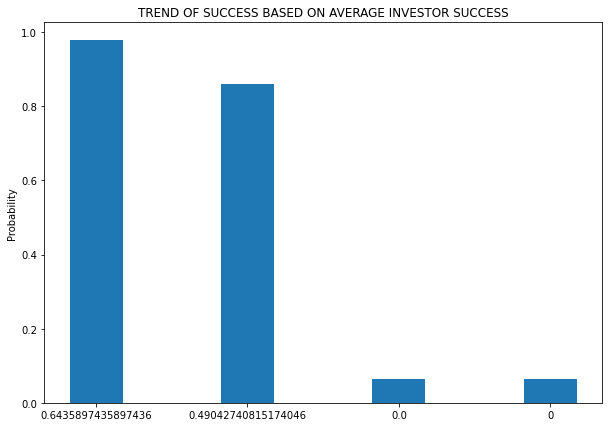

In [168]:
#average_investor_success grouping
average_investor_success_success_quantiles = (np.percentile(df_All_Companies_merged['average_investor_success'][(np.isnan(df_All_Companies_merged['average_investor_success']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
average_investor_success_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['average_investor_success'][(np.isnan(df_All_Companies_merged['average_investor_success']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['average_investor_success_grouping_scaling'] = float('nan')

boundaries = [average_investor_success_success_quantiles[4] + 1, 
              average_investor_success_success_quantiles[3], 
              average_investor_success_success_quantiles[2], 
              average_investor_success_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['average_investor_success'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['average_investor_success'] < boundaries[idx]) ,'average_investor_success_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['average_investor_success_grouping_scaling','average_investor_success']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['average_investor_success_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_investor_success_grouping_scaling']) == False) & (df_All_Companies_merged['average_investor_success'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['average_investor_success_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_investor_success_grouping_scaling']) == False) & (df_All_Companies_merged['average_investor_success'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON AVERAGE INVESTOR SUCCESS')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\average_investor_success_grouping_scaling.png') 
plt.show()

The correlation between Success and average_investor_success_binary_grouping_scaling: 0.6399799568554502
The correlation between Success and average_investor_success: 0.7589064429889038
[306, 8303]


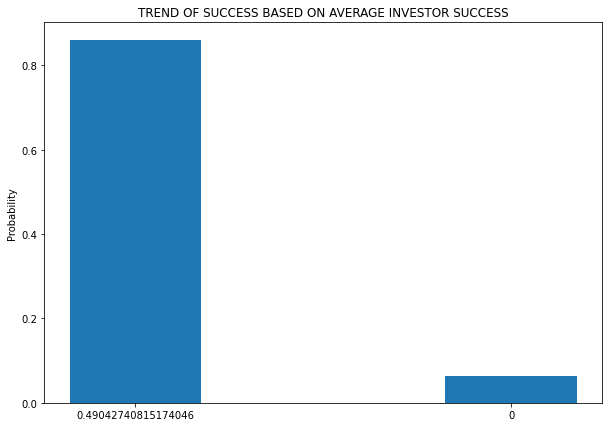

In [169]:
#average_investor_success binary grouping
average_investor_success_success_quantiles = (np.percentile(df_All_Companies_merged['average_investor_success'][(np.isnan(df_All_Companies_merged['average_investor_success']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
average_investor_success_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['average_investor_success'][(np.isnan(df_All_Companies_merged['average_investor_success']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['average_investor_success_binary_grouping_scaling'] = float('nan')

boundaries = [average_investor_success_success_quantiles[4] + 1, 
              average_investor_success_success_quantiles[2], 
              0]
grouping_scale = [1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['average_investor_success'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['average_investor_success'] < boundaries[idx]) ,'average_investor_success_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['average_investor_success_binary_grouping_scaling','average_investor_success']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['average_investor_success_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_investor_success_binary_grouping_scaling']) == False) & (df_All_Companies_merged['average_investor_success'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['average_investor_success_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_investor_success_binary_grouping_scaling']) == False) & (df_All_Companies_merged['average_investor_success'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON AVERAGE INVESTOR SUCCESS')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\average_investor_success_binary_grouping_scaling.png') 
plt.show()

The correlation between Success and founders_connectedness_factor_based_on_university_grouping_scaling: 0.06473026821897984
The correlation between Success and founders_connectedness_factor_based_on_university: 0.04212842814402867
[1459, 2092, 5730, 5730]


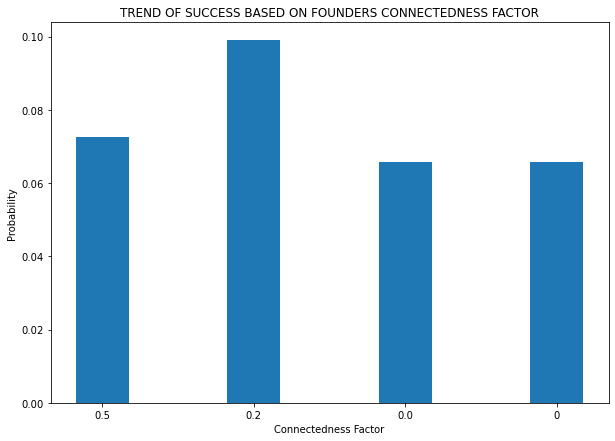

In [170]:
#founders_connectedness_factor_based_on_university grouping
founders_connectedness_factor_based_on_university_success_quantiles = (np.percentile(df_All_Companies_merged['founders_connectedness_factor_based_on_university'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
founders_connectedness_factor_based_on_university_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['founders_connectedness_factor_based_on_university'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['founders_connectedness_factor_based_on_university_grouping_scaling'] = float('nan')

boundaries = [founders_connectedness_factor_based_on_university_success_quantiles[4] + 1, 
              founders_connectedness_factor_based_on_university_success_quantiles[3], 
              founders_connectedness_factor_based_on_university_success_quantiles[2], 
              founders_connectedness_factor_based_on_university_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['founders_connectedness_factor_based_on_university'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['founders_connectedness_factor_based_on_university'] < boundaries[idx]) ,'founders_connectedness_factor_based_on_university_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['founders_connectedness_factor_based_on_university_grouping_scaling','founders_connectedness_factor_based_on_university']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['founders_connectedness_factor_based_on_university_grouping_scaling'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university_grouping_scaling']) == False) & (df_All_Companies_merged['founders_connectedness_factor_based_on_university'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['founders_connectedness_factor_based_on_university_grouping_scaling'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university_grouping_scaling']) == False) & (df_All_Companies_merged['founders_connectedness_factor_based_on_university'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Connectedness Factor')
plt.title('TREND OF SUCCESS BASED ON FOUNDERS CONNECTEDNESS FACTOR')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\founders_connectedness_factor_based_on_university_grouping_scaling.png') 
plt.show()

The correlation between Success and founders_connectedness_factor_based_on_university_binary_grouping_scaling: 0.10140860101104011
The correlation between Success and founders_connectedness_factor_based_on_university: 0.04212842814402867
[2092, 5730]


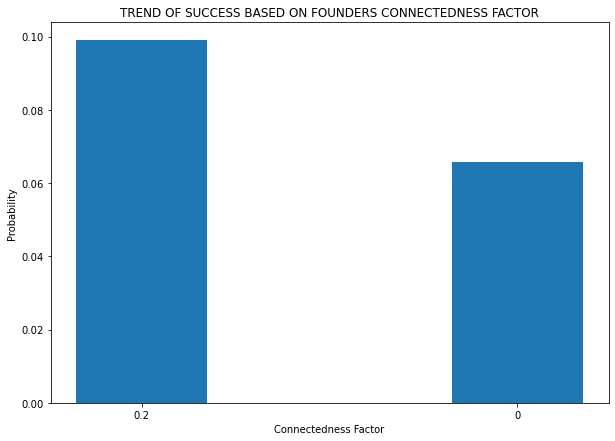

In [171]:
#founders_connectedness_factor_based_on_university binary grouping
founders_connectedness_factor_based_on_university_success_quantiles = (np.percentile(df_All_Companies_merged['founders_connectedness_factor_based_on_university'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
founders_connectedness_factor_based_on_university_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['founders_connectedness_factor_based_on_university'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['founders_connectedness_factor_based_on_university_binary_grouping_scaling'] = float('nan')

boundaries = [founders_connectedness_factor_based_on_university_success_quantiles[4] + 1, 
              founders_connectedness_factor_based_on_university_success_quantiles[2],
              0]
grouping_scale = [1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['founders_connectedness_factor_based_on_university'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['founders_connectedness_factor_based_on_university'] < boundaries[idx]) ,'founders_connectedness_factor_based_on_university_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['founders_connectedness_factor_based_on_university_binary_grouping_scaling','founders_connectedness_factor_based_on_university']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['founders_connectedness_factor_based_on_university_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university_binary_grouping_scaling']) == False) & (df_All_Companies_merged['founders_connectedness_factor_based_on_university'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['founders_connectedness_factor_based_on_university_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university_binary_grouping_scaling']) == False) & (df_All_Companies_merged['founders_connectedness_factor_based_on_university'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.xlabel('Connectedness Factor')
plt.title('TREND OF SUCCESS BASED ON FOUNDERS CONNECTEDNESS FACTOR')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\founders_connectedness_factor_based_on_university_binary_grouping_scaling.png') 
plt.show()

The correlation between Success and best_score_universities_of_founders_grouping_scaling: 0.07717743634262204
The correlation between Success and best_score_universities_of_founders: 0.07831062523790133
[1803, 3594, 5341, 10524]


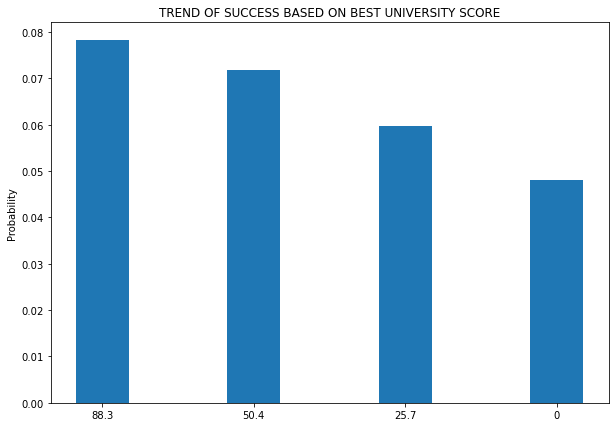

In [172]:
#founders_connectedness_factor_based_on_university grouping
best_score_universities_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['best_score_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
best_score_universities_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['best_score_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['best_score_universities_of_founders_grouping_scaling'] = float('nan')

boundaries = [best_score_universities_of_founders_success_quantiles[4] + 1, 
              best_score_universities_of_founders_success_quantiles[3], 
              best_score_universities_of_founders_success_quantiles[2], 
              best_score_universities_of_founders_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['best_score_universities_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['best_score_universities_of_founders'] < boundaries[idx]) ,'best_score_universities_of_founders_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['best_score_universities_of_founders_grouping_scaling','best_score_universities_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['best_score_universities_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['best_score_universities_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['best_score_universities_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['best_score_universities_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON BEST UNIVERSITY SCORE')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\best_score_universities_of_founders_grouping_scaling.png') 
plt.show()

The correlation between Success and best_score_universities_of_founders_binary_grouping_scaling: 0.07979779136316482
The correlation between Success and best_score_universities_of_founders: 0.07831062523790133
[3594, 10524]


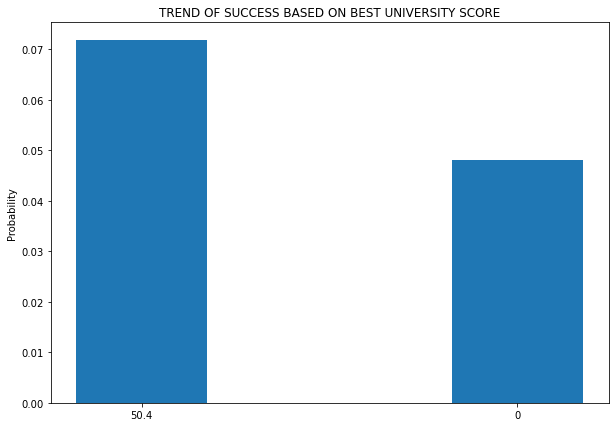

In [173]:
#founders_connectedness_factor_based_on_university grouping
best_score_universities_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['best_score_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
best_score_universities_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['best_score_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['best_score_universities_of_founders_binary_grouping_scaling'] = float('nan')

boundaries = [best_score_universities_of_founders_success_quantiles[4] + 1, 
              best_score_universities_of_founders_success_quantiles[2], 
              0]
grouping_scale = [1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['best_score_universities_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['best_score_universities_of_founders'] < boundaries[idx]) ,'best_score_universities_of_founders_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['best_score_universities_of_founders_binary_grouping_scaling','best_score_universities_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['best_score_universities_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['best_score_universities_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['best_score_universities_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['best_score_universities_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON BEST UNIVERSITY SCORE')
plt.xticks(ind, boundaries[1:])
plt.savefig(r'Figures\best_score_universities_of_founders_binary_grouping_scaling.png') 
plt.show()

In [174]:
'''
1. WE CREATE A NEW COLUMN IN THE DATA FRAME AND GIVE IT A VALUE OF 1 IF THE COMPANY OPERATES IN ONE OF THE TOP 10
CATEGORIES

2. WE CREATE A NEW COLUMN IN THE DATA FRAME AND GIVE IT A VALUE OF 1 IF THE COMPANY OPERATES IN ONE OF THE TOP 10
CATEGORY GROUPS

3. WE CREATE A NEW COLUMN IN THE DATA FRAME AND GIVE IT A VALUE OF 1 IF THE COMPANY RECIEVED FUNDING FROM ONE OF THE
TOP 10 MOST ACTIVE INVESTORS

4. WE CREATE A NEW COLUMN IN THE DATA FRAME AND GIVE IT A VALUE OF 1 IF ONE OF THE FOUNDERS WORKED FOR A POUPULAR
COMPANY

'''

top_10_categories = [x[1] for idx, x in enumerate(list_all_categories_and_count) if idx < 10]
top_10_investors = [x[1] for idx, x in enumerate(list_all_investor_names_and_count) if idx < 10]
top_10_category_groups = [x[1] for idx, x in enumerate(list_all_category_groups_and_count) if idx < 10]
top_10_previous_companies = [x[1] for idx, x in enumerate(list_all_prev_companies_of_founders_and_count) if ((idx < 11) and idx != 1)]


df_All_Companies_merged['top_10_categories_flag'] = float('nan')
df_All_Companies_merged['top_10_investors_flag'] = float('nan')
df_All_Companies_merged['top_10_category_groups_flag'] = float('nan')
df_All_Companies_merged['top_10_previous_companies_flag'] = float('nan')

columns_of_interest_names = ['category_list',
                             'investor_name',
                             'category_groups_list',
                             'prev_companies_of_founders']


columns_of_flags = ['top_10_categories_flag',
                    'top_10_investors_flag',
                    'top_10_category_groups_flag',
                    'top_10_previous_companies_flag']

for idx in range(len(df_All_Companies_merged.index)):
    for idx2, value in enumerate(columns_of_interest_names):
        if isinstance(df_All_Companies_merged.at[idx,value], str):
            flag = False
            for temp_name in top_10_categories:
                if temp_name in df_All_Companies_merged.at[idx,value]:
                    flag = True
                    break
            if flag:
                df_All_Companies_merged.at[idx, columns_of_flags[idx2]] = 1
            else: 
                df_All_Companies_merged.at[idx, columns_of_flags[idx2]] = 0

In [175]:
'''Now we will save the dataframe for easier future access

REMEMBER TO CHANGE THE FLAG WHEN APPROPIATE
'''

save_datafram_flag  = True
if save_datafram_flag: df_All_Companies_merged.to_pickle(r'Data\df_All_Companies_merged_with_features.pkl')